<a href="https://colab.research.google.com/github/cecilia-wanja/Prediction-of-the-people-who-were-likely-to-survive-in-the-Titanic/blob/master/People_likely_to_survive_in_the_Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Background Information


The sinking of the Titanic is one of the most infamous shipwrecks in history.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

We are provided with the following columns:
PassengerId - Unique ID of the passenger

Pclass - Passenger's class (1st, 2nd, or 3rd)

Name - Passenger's name

Survived - Survived (1) or died (0)

Sex - Passenger's sex

Age - Passenger's age

SibSp - Number of siblings/spouses aboard the Titanic

Parch - Number of parents/children aboard the Titanic

Ticket - Ticket number

Fare - Fare paid for ticket

Cabin - Cabin number

Embarked - Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q = Queenstown)


## Question

***We will use simple machine learning to address the prediction.In this case, KNearestNeighbors and Naive Bayes Theorem***

In [0]:
#first off, we will import the necessary libraries we will use in our workbook

#pandas for data analysis
import pandas as pd

#numpy for scientific computing of arrays
import numpy as np

#a visualization library
import matplotlib.pyplot as plt



In [0]:
#loading the dataset to the notebook
df = pd.read_csv('train.csv')


In [129]:
#comparing the number of rows and columns in the previous datasets as well the newly dataset
print('my dataset has:', df.shape)



my dataset has: (891, 12)


In [130]:
#we will now preview our new dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning

In [131]:
#this process involves a series of activities that will make my dataset fit for analysis

#checking the null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
df.shape

(891, 12)

In [133]:
#the cabin column seems to have the most missing values.
#lets call the unique values to get a deeper understanding of the column
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [134]:
#the cabin column is a representation of where the passengers slept which may have affected their survival or not.
#hence we will retain the cumn and make a few adjustments.
df['Class'] = df['Cabin'].str.slice(0,1)
df.Class.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [0]:
#dropping the Cabin column since it has been replaced with the Class column I just Created.
df.drop('Cabin', axis = 1, inplace = True)

In [0]:
#remember that there were missing values in the Class column hence I will classify those as another set of class element and assign the letter N as their class.
df['Class'] = df['Class'].fillna('N')

In [137]:
#confirming the unique values in our new Class column.
df.Class.unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [0]:
df['Age'] = df['Age'].fillna(df['Age'].mean(),)

In [139]:
#confirming the number of null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Class          0
dtype: int64

In [0]:
#dealing with embarked column missing values

df['Embarked'] = df['Embarked'].fillna('N')

In [141]:
df.Embarked.unique()

array(['S', 'C', 'Q', 'N'], dtype=object)

In [142]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Class          0
dtype: int64

***As for the Cabin column and Embarked column missing values, I replaced with N to symbolise the missing values.***


##Exploratory Data Analysis

In [143]:
#Statistical overview of our dataset

df.PassengerId.value_counts().sum()

891

***We will be analysing 891 passenger information in this dataset***

In [144]:
df.Survived.unique()

array([0, 1])

In [145]:
#looking at the number of people who survived
survived = (df['Survived'] == 1).sum()
survived



342

***among the 891 passengers in the titanic who were there, only 342 survived.***

In [146]:
passclass = df.groupby(['Pclass','Survived'])
passclass.count()

PassengerId  Name  Sex  Age  ...  Ticket  Fare  Embarked  Class
Pclass Survived                               ...                               
1      0                  80    80   80   80  ...      80    80        80     80
       1                 136   136  136  136  ...     136   136       136    136
2      0                  97    97   97   97  ...      97    97        97     97
       1                  87    87   87   87  ...      87    87        87     87
3      0                 372   372  372  372  ...     372   372       372    372
       1                 119   119  119  119  ...     119   119       119    119

[6 rows x 10 columns]

<function matplotlib.pyplot.tight_layout>

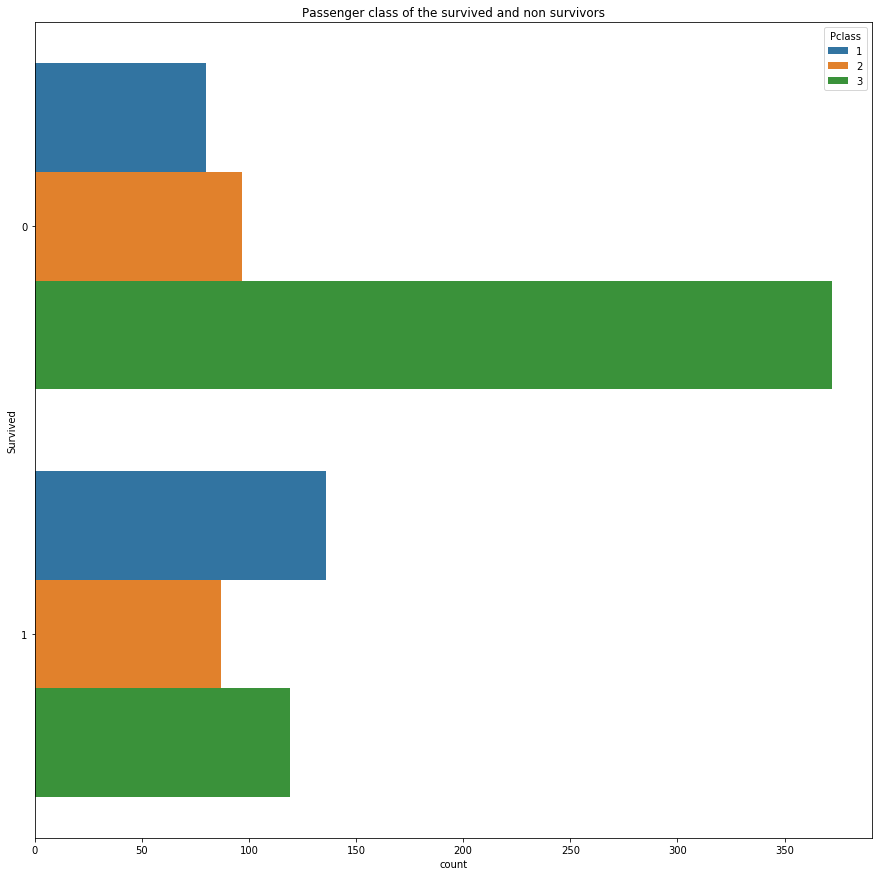

In [147]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (15,15))

sns.countplot(y = 'Survived', hue = 'Pclass', data = df)

plt.title('Passenger class of the survived and non survivors')

plt.tight_layout

***The number of people who survived are represented by the number 1 whereas those who did not survive are represented by the number 0.***

***The ones who survived in 1st class are 136 as compared to the ones who die...80.***

***In 2nd class, the ones who survived are less than the ones who died.***

***In 3rd class the ones who died are more than those who did survive.***

***this could mean a couple of things:***

**that the 1st class passengers were given a first priority**

**that their rooms were close to the life boats used to save the passengers.**

**that the 2nd and the 3rd class passengers did not have lifeboats near their room areas.**

In [148]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [149]:
female = df[df['Sex'] == 'female']
female.count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Embarked       314
Class          314
dtype: int64

In [150]:
male = df[df['Sex'] == 'male']
male.count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            577
SibSp          577
Parch          577
Ticket         577
Fare           577
Embarked       577
Class          577
dtype: int64

<function matplotlib.pyplot.tight_layout>

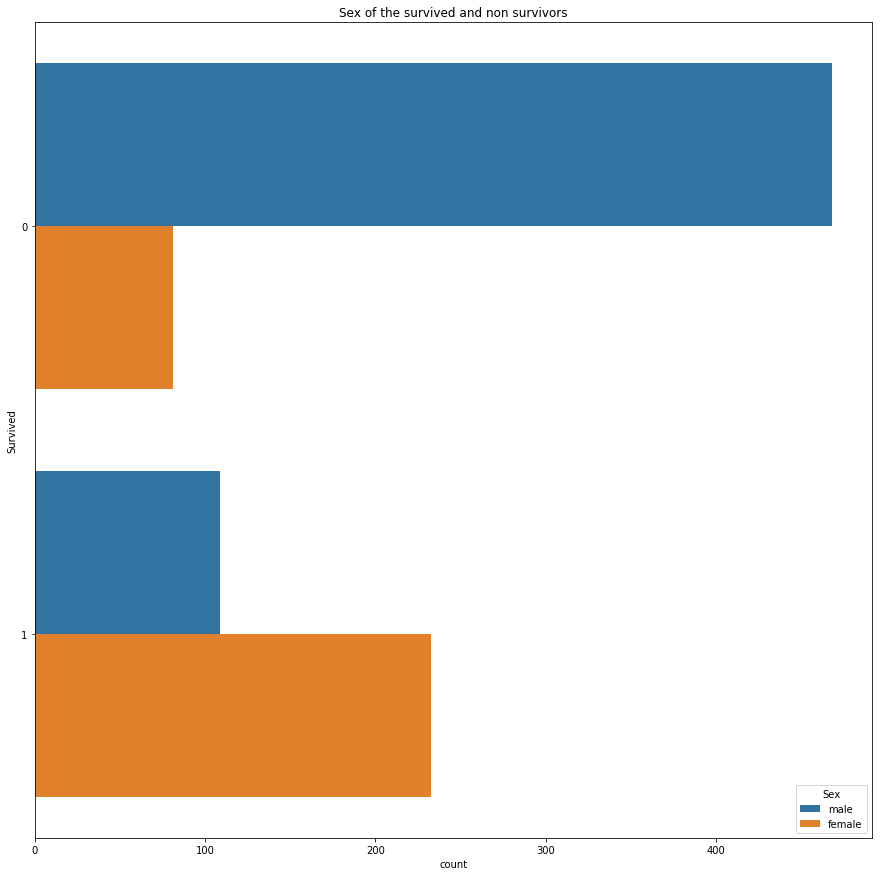

In [151]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (15,15))

sns.countplot(y = 'Survived', hue = 'Sex', data = df)

plt.title('Sex of the survived and non survivors')

plt.tight_layout

***This shows that the number of female who survived are more than the number of male.***
***we can conclude that female were given the first priotity when boarding the life boats***

In [152]:
#calling the columns again

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Class'],
      dtype='object')

<function matplotlib.pyplot.tight_layout>

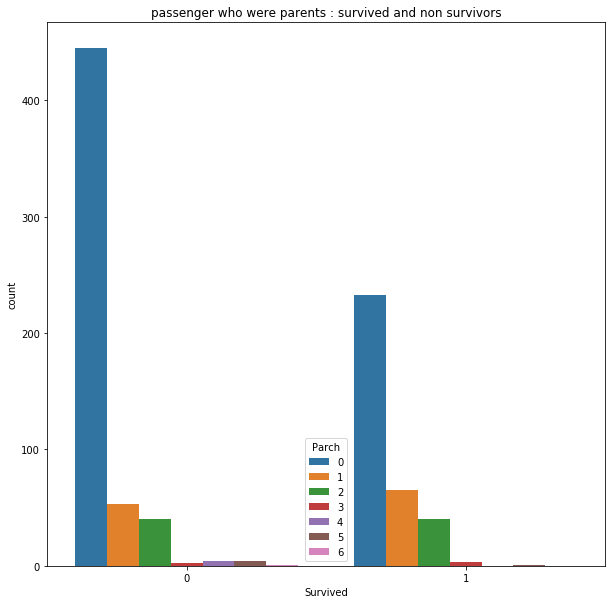

In [153]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (10,10))

sns.countplot(x = 'Survived', hue = 'Parch', data = df)

plt.title('passenger who were parents : survived and non survivors')

plt.tight_layout

***this shows that the more kids an individual has then the chances of survival increased.***

<function matplotlib.pyplot.tight_layout>

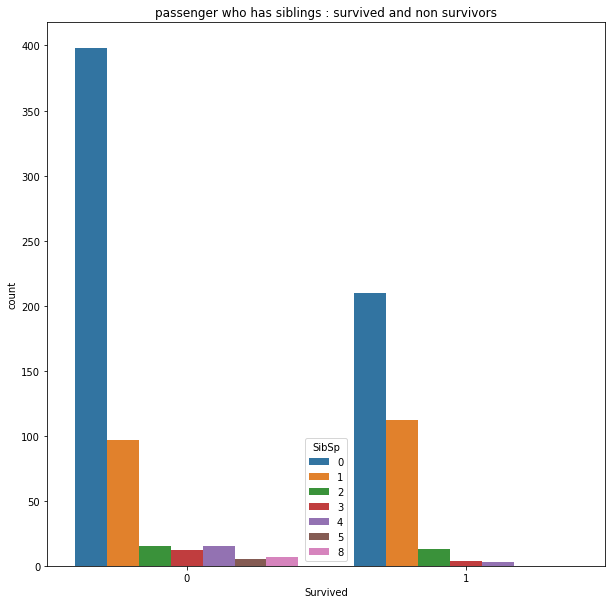

In [154]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (10,10))

sns.countplot(x = 'Survived', hue = 'SibSp', data = df)

plt.title('passenger who has siblings : survived and non survivors')

plt.tight_layout

***This shows that the more the number of siblings an individual had, then the chances of survival increased.***

<function matplotlib.pyplot.tight_layout>

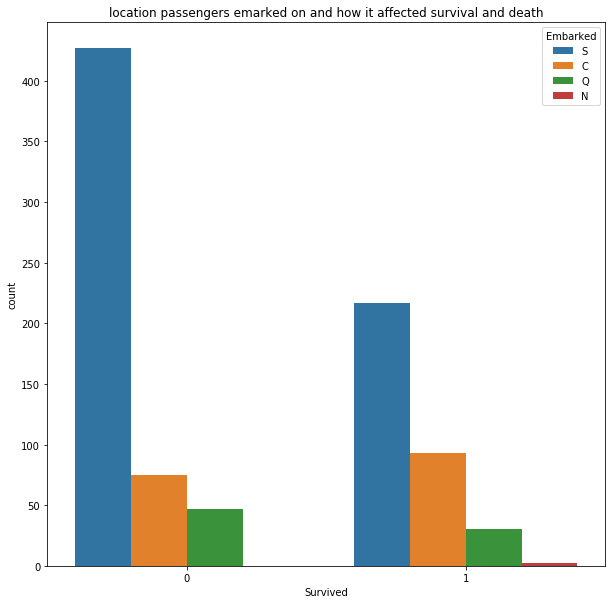

In [155]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (10,10))

sns.countplot(x = 'Survived', hue = 'Embarked', data = df)

plt.title('location passengers emarked on and how it affected survival and death')

plt.tight_layout

***C - Cherbourg, S - Southampton, Q = Queenstown, N = not known***

***In order of arrival, the passengers boarded Titanic in Sothampton,Cherbourg then Queenstown.***

***This means that the first people who boarded the titanic died the most as compared to the rest.***

***The location passengers embarked greatly affected their survival rate.***

<function matplotlib.pyplot.tight_layout>

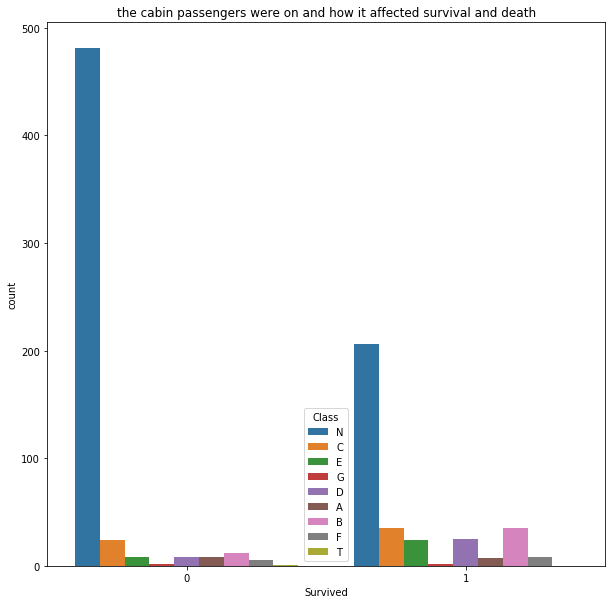

In [156]:
#importing the library we will use
import seaborn as sns


ax = plt.subplots(figsize = (10,10))

sns.countplot(x = 'Survived', hue = 'Class', data = df)

plt.title('the cabin passengers were on and how it affected survival and death')

plt.tight_layout

***The number of people who were not assigned cabin numbers were the most, but we'll concentrate on the ones who were.***

***the cabin members in c died the most as compared to the rest.But as you compare the number of survivors of cabin c, and their corresponding deceased, the people who survived are more than the people who died.***

***this column does not show clarity because of the number of'not known' that are in the column.But we will go ahead and still use it.***

<Figure size 1008x2160 with 0 Axes>

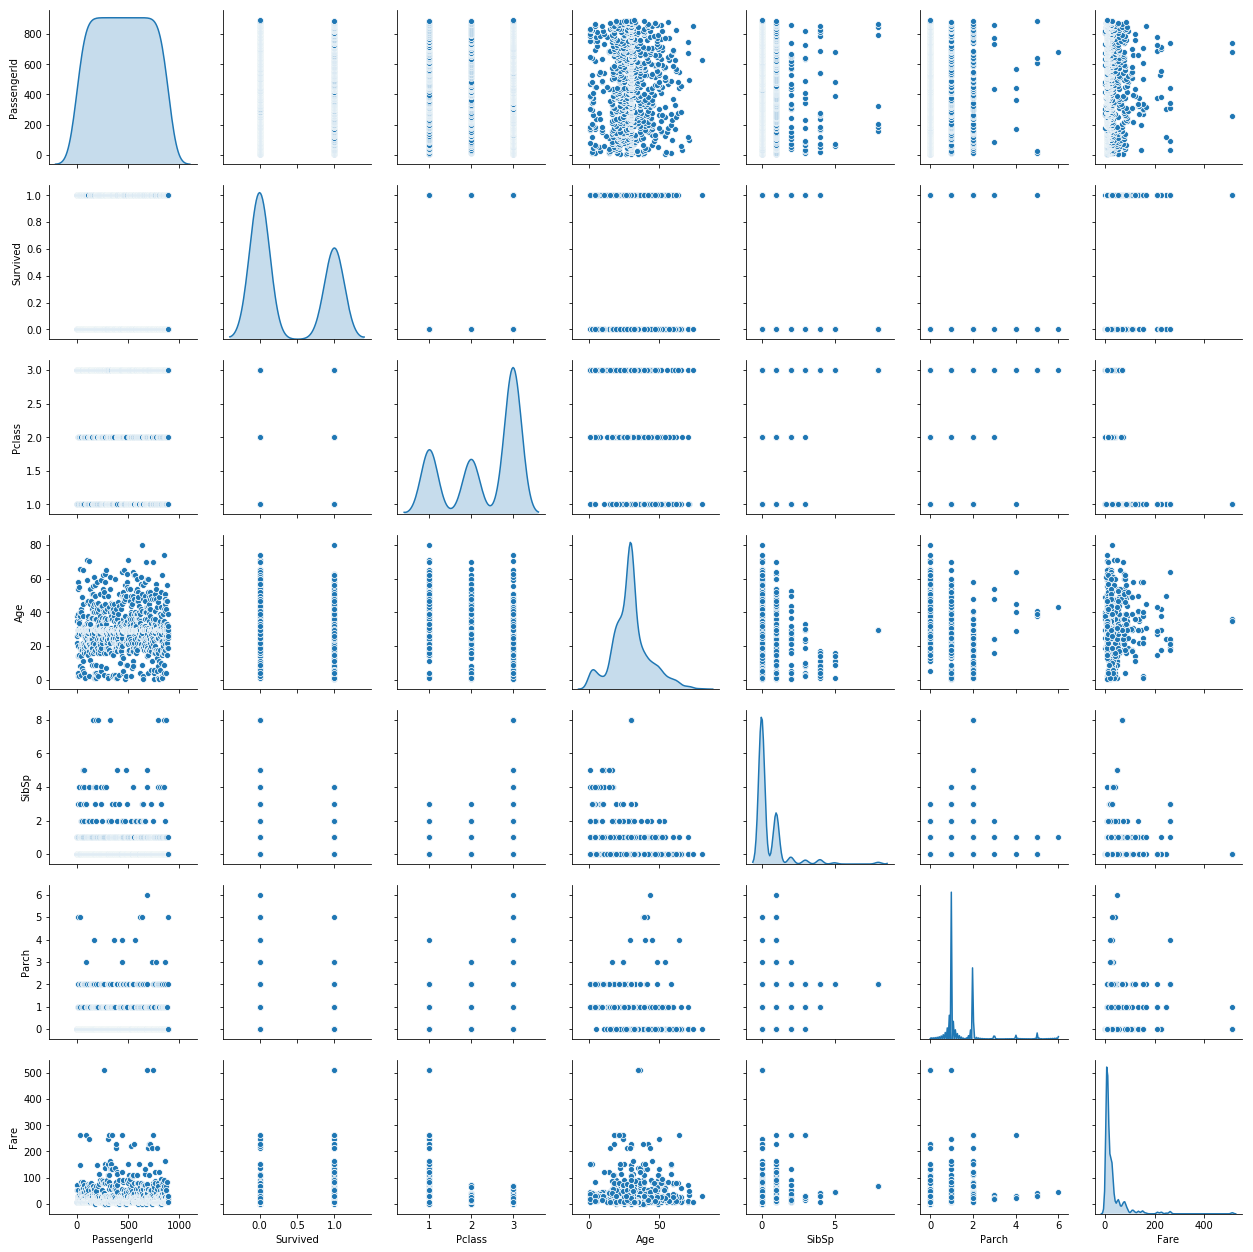

In [157]:
#Crossplots distribution
plt.figure(figsize=(14, 30))
sns.pairplot(df, diag_kind='kde');
plt.show()

***The above plot shows the relationship between the variables***

## Modelling

***We'll be using KNN as well as Naive Bayes classification Models***

**KNN classifier**

In [158]:
#first off we will label encode the categorical data.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Class           object
dtype: object

In [159]:
#dropping the unnecessary columns in the dataset
df = df.drop(['Name','Ticket'],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class
0,1,0,3,male,22.0,1,0,7.2500,S,N
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,N
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,N


In [160]:
#defining the columns I need
s = ['Sex','Embarked','Class']

#changing the columns defined from categrorical to numerical
dummy = pd.get_dummies(df[s])
dummy.head()

#joing the dummied variables with the original dataset
df = pd.concat([df, dummy],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Class,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Class_A,Class_B,Class_C,Class_D,Class_E,Class_F,Class_G,Class_N,Class_T
0,1,0,3,male,22.0,1,0,7.2500,S,N,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,C,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,N,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,C,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,N,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [161]:
#deleting the previous columns that were not numerical
df = df.drop(['Sex', 'Embarked','Class'],axis = 1)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Class_A,Class_B,Class_C,Class_D,Class_E,Class_F,Class_G,Class_N,Class_T
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
#we will then define our dependent variable x, and our independent variables y.

x = df.drop('Survived', axis = 1)
y = df[['Survived']]

In [163]:
pd.DataFrame(x).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S,Class_A,Class_B,Class_C,Class_D,Class_E,Class_F,Class_G,Class_N,Class_T
0,1,3,22.0,1,0,7.2500,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
#to avoid overfitting, we divide the dataset into training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.15)

In [165]:
#for KNN we have to standardize for all the features to be uniformly distributed.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#standardizing my x test and x train

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)

In [167]:
# importing the necessary libraries for our Knn model
from sklearn.neighbors import KNeighborsClassifier

#our n values below will be the number of k
#the digit 5 is mostly used for the KNN algorithm hence we will input here as well.
classifier = KNeighborsClassifier()

classifier.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#making the prediction
y_pred = classifier.predict(x_test)


In [169]:
#evaluation using the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[87  8]
 [16 23]]


In [170]:
#evaluation using classification matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        95
           1       0.74      0.59      0.66        39

    accuracy                           0.82       134
   macro avg       0.79      0.75      0.77       134
weighted avg       0.81      0.82      0.81       134



In [171]:
print(metrics.accuracy_score(y_test,y_pred))

0.8208955223880597


***With knn we achieved an accuracy of 82% which is a fairly good accuracy score of our model.***

**Logistic Regression**

In [172]:
#I used logistic because we are dealing with binary data as well

#importing the necessary libraries

from sklearn.linear_model import LogisticRegression

#defining the model
log = LogisticRegression()

#fitting the model into our training set
log.fit(x_train, y_train)

#prediction using the model
y_pred = log.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        95
           1       0.72      0.72      0.72        39

    accuracy                           0.84       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.84      0.84      0.84       134



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***We recorded an accuracy level of 77% with Logistic regression which is not the best due tothe imbalance of our dataset.***

**Naive Bayes**

In [173]:
df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              169.052400
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
Sex_female         0.228475
Sex_male           0.228475
Embarked_C         0.153172
Embarked_N         0.002242
Embarked_Q         0.079040
Embarked_S         0.200593
Class_A            0.016570
Class_B            0.050023
Class_C            0.061902
Class_D            0.035705
Class_E            0.034664
Class_F            0.014394
Class_G            0.004474
Class_N            0.176734
Class_T            0.001122
dtype: float64

In [0]:
#importing the different types of Naive Byes models
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB

#defining the three models of naive bayes that we are going to use.
gau = GaussianNB()
bern = BernoulliNB()



In [0]:
#dividing our dataset into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [176]:
#training using the models above
gau.fit(x_train, y_train)
#multi.fit(x_train, y_train)
bern.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [0]:
#predicting the outcome
y_pred1 = gau.predict(x_test)

y_pred3 = bern.predict(x_test)

In [178]:
#evaluating the model

#importing the necessary libraries
from sklearn import metrics

#model accuracy
print('Accuracy of Gaussian:', metrics.accuracy_score(y_test,y_pred1)*100)
print('\n')

print('Accuracy of Bernoulli:',metrics.accuracy_score(y_test,y_pred3)*100)
print('\n')

#classification report of each
print('Classification report of Gaussian:',)
print(classification_report(y_test,y_pred1))


#print('Classification report of Multinomial:', classification_report(y_test,y_pred2))
print('Classification report of Bernoulli:',)
print(classification_report(y_test,y_pred3))

Accuracy of Gaussian: 70.94972067039106


Accuracy of Bernoulli: 81.00558659217877


Classification report of Gaussian:
              precision    recall  f1-score   support

           0       0.71      0.87      0.79       109
           1       0.70      0.46      0.55        70

    accuracy                           0.71       179
   macro avg       0.70      0.66      0.67       179
weighted avg       0.71      0.71      0.69       179

Classification report of Bernoulli:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



***Recommendation and Conclusion***

Having used the Gaussian and the Bernoulli naive bayes models, the Gaussian performed better than the Bernoulli.
Taking a look at the accuracy score, where Bernoulli attained 79% whereas Gaussian attained 80%.
The precision of the Gaussian is better than the Benoulli. 
We recorded survivors precision to be 0.85 while that of non survivprs was 0.74.
In Bernoulli the survivors precision was 0.83 while of the non survivors was 0.72.

This means to shoow that Gussian records a better precision than that of Bernoulli.